<a href="https://colab.research.google.com/github/pebehv/Deep-Learning/blob/master/Notebooks/Chap10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [2]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [3]:
import numpy as np

def subsample(x_in):
    """
    Realiza una operación de submuestreo (Max Pooling) en un array 2D.

    Reduce la dimensión del array a la mitad (aproximadamente, redondeando hacia arriba)
    tomando el valor máximo de ventanas de 2x2 con un stride de 2.

    Args:
        x_in (np.array): Array NumPy 2D de entrada.

    Returns:
        np.array: Array NumPy 2D submuestreado.
    """

    # Calcular las dimensiones de salida redondeando hacia arriba
    # Esto asegura que incluso si la dimensión de entrada es impar,
    # habrá un lugar para el último elemento.
    output_rows = int(np.ceil(x_in.shape[0] / 2))
    output_cols = int(np.ceil(x_in.shape[1] / 2))

    # Inicializar el array de salida con ceros
    x_out = np.zeros((output_rows, output_cols), dtype=x_in.dtype)

    # Definir el tamaño de la ventana (kernel) y el stride para el pooling
    pool_size = 2
    stride = 2

    # Iterar sobre las dimensiones del array de salida
    for r_out in range(output_rows):
        for c_out in range(output_cols):
            # Calcular las coordenadas de inicio de la ventana en el array de entrada
            r_start = r_out * stride
            c_start = c_out * stride

            # Calcular las coordenadas de fin de la ventana en el array de entrada
            # Usamos min() para manejar los bordes cuando la dimensión de entrada es impar
            r_end = min(r_start + pool_size, x_in.shape[0])
            c_end = min(c_start + pool_size, x_in.shape[1])

            # Extraer la ventana (patch) del array de entrada
            # Si las dimensiones son impares, el patch puede ser más pequeño que 2x2
            current_patch = x_in[r_start:r_end, c_start:c_end]

            # Tomar el valor máximo de la ventana y asignarlo a la salida
            # Si el patch está vacío (lo cual no debería ocurrir con la lógica de ceil y min),
            # np.max() podría dar un error, pero con esta implementación es seguro.
            x_out[r_out, c_out] = np.max(current_patch)

    return x_out

In [4]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[6 8]
 [8 4]]


Let's try that on an image to get a feel for how it works:

In [5]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

--2025-07-30 00:48:41--  https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60792 (59K) [image/png]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  59.37K  --.-KB/s    in 0.01s   

2025-07-30 00:48:42 (5.78 MB/s) - ‘test_image.png’ saved [60792/60792]



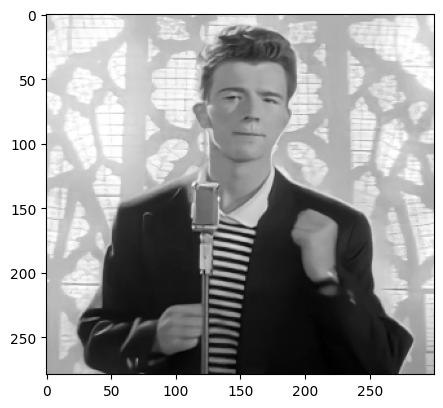

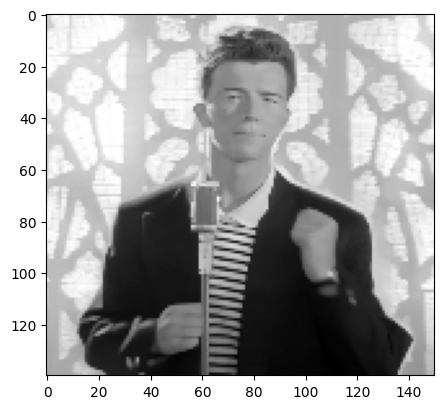

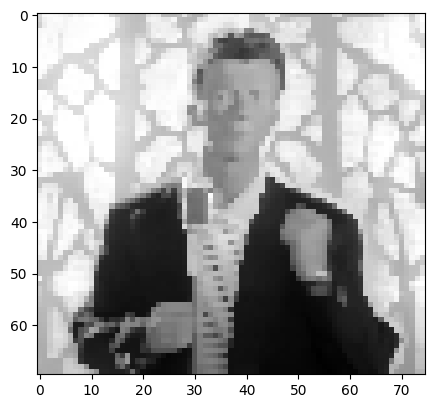

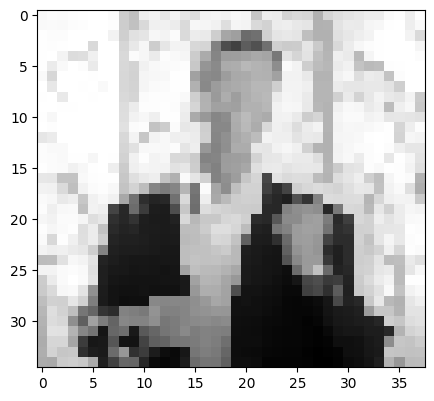

In [6]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [7]:
# Now let's try max-pooling
def maxpool(x_in):
  # Initialize the output array with the correct dimensions, using np.ceil
  # to handle odd-sized inputs correctly.
  output_rows = int(np.ceil(x_in.shape[0]/2))
  output_cols = int(np.ceil(x_in.shape[1]/2))
  x_out = np.zeros((output_rows, output_cols))

  # Define the pooling window size and stride
  pool_size = 2
  stride = 2

  # Iterate over the output array dimensions
  for r_out in range(output_rows):
      for c_out in range(output_cols):
          # Calculate the window start and end coordinates in the input array
          r_start = r_out * stride
          c_start = c_out * stride
          r_end = min(r_start + pool_size, x_in.shape[0])
          c_end = min(c_start + pool_size, x_in.shape[1])

          # Extract the current patch from the input array
          current_patch = x_in[r_start:r_end, c_start:c_end]

          # Find the maximum value in the patch and assign it to the output
          x_out[r_out, c_out] = np.max(current_patch)

  return x_out

In [8]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


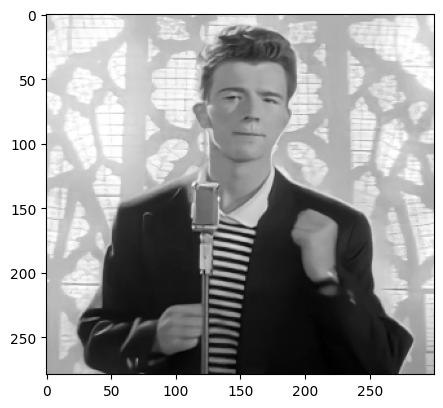

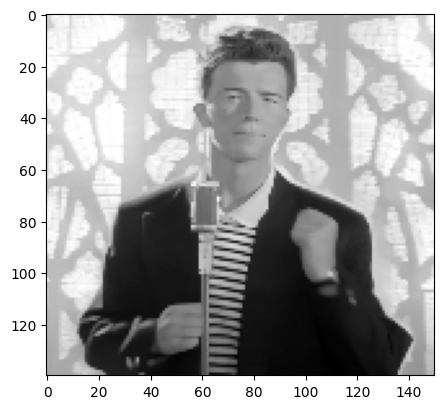

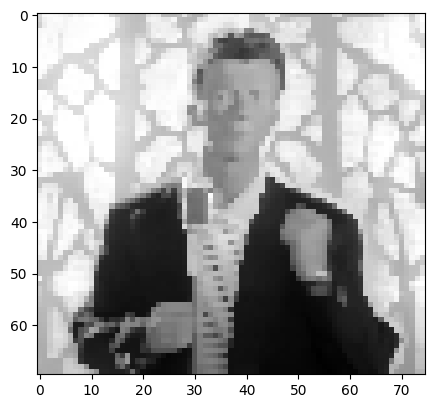

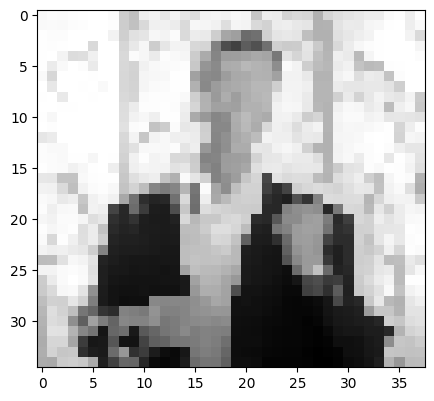

In [9]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [10]:
# Finally, let's try mean pooling
def meanpool(x_in):
  #x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  # TODO -- write the meanpool routine
  # Replace this line
  """
  Realiza una operación de mean pooling (agrupación por promedio) en una matriz 2D.

  Esta función reduce las dimensiones espaciales de la entrada a la mitad
  tomando el promedio de cada bloque de 2x2 elementos.

  Args:
    x_in (np.ndarray): La matriz de entrada 2D sobre la que se realizará el pooling.

  Returns:
    np.ndarray: La matriz de salida 2D con las dimensiones reducidas.
  """
  # Calcula las dimensiones de la matriz de salida.
  # np.floor asegura que se redondea hacia abajo, manejando casos donde
  # las dimensiones de entrada son impares (el último elemento o fila/columna
  # se ignora si no forma un bloque completo de 2x2).
  out_height = int(np.floor(x_in.shape[0] / 2))
  out_width = int(np.floor(x_in.shape[1] / 2))

  # Inicializa la matriz de salida con ceros.
  x_out = np.zeros((out_height, out_width))

  # Itera sobre la matriz de entrada con un paso (stride) de 2
  # para procesar bloques de 2x2.
  for i in range(out_height):
    for j in range(out_width):
      # Define las coordenadas del bloque 2x2 en la matriz de entrada.
      # Cada bloque comienza en (i*2, j*2) y tiene un tamaño de 2x2.
      block = x_in[i*2 : i*2 + 2, j*2 : j*2 + 2]

      # Calcula el promedio de los elementos dentro del bloque.
      # np.mean() calcula el promedio de todos los elementos en la submatriz 'block'.
      x_out[i, j] = np.mean(block)

  return x_out

In [11]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


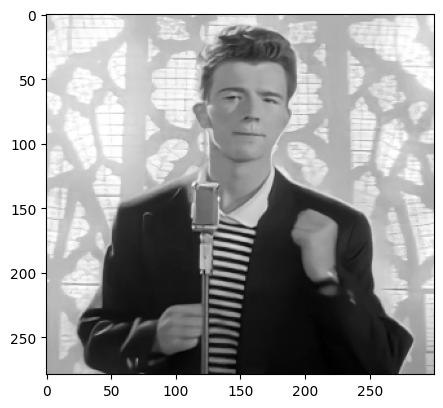

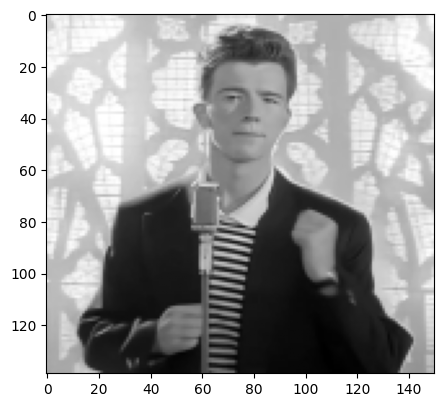

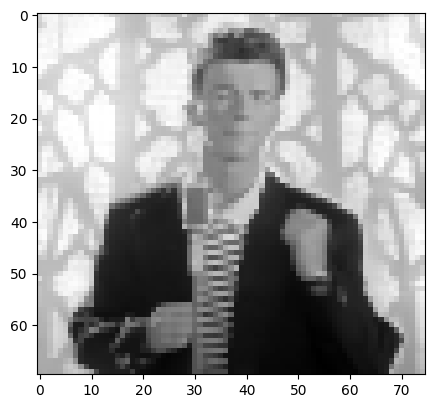

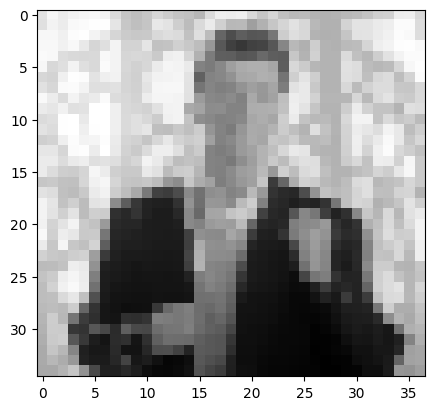

In [12]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [13]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [14]:
# Let's first use the duplication method
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the duplication routine
  # Replace this line
  #x_out = x_out
    # Calcula las dimensiones de la matriz de salida, que son el doble de las de entrada.
  out_height = x_in.shape[0] * 2
  out_width = x_in.shape[1] * 2

  # Inicializa la matriz de salida con ceros.
  x_out = np.zeros((out_height, out_width))

  # Itera sobre cada elemento de la matriz de entrada.
  for i in range(x_in.shape[0]):
    for j in range(x_in.shape[1]):
      # Toma el valor del elemento actual de la matriz de entrada.
      value = x_in[i, j]

      # Asigna este valor a un bloque de 2x2 en la matriz de salida.
      # Las coordenadas de inicio del bloque en x_out son (i*2, j*2).
      x_out[i*2 : i*2 + 2, j*2 : j*2 + 2] = value

  return x_out

In [15]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[6. 6. 8. 8.]
 [6. 6. 8. 8.]
 [8. 8. 4. 4.]
 [8. 8. 4. 4.]]


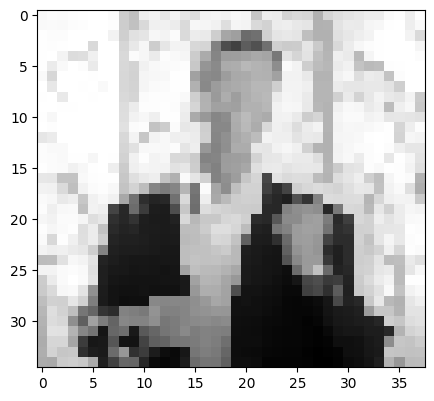

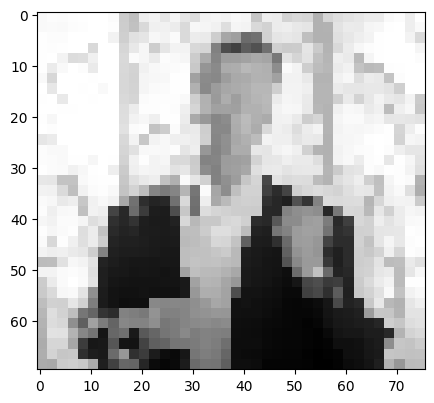

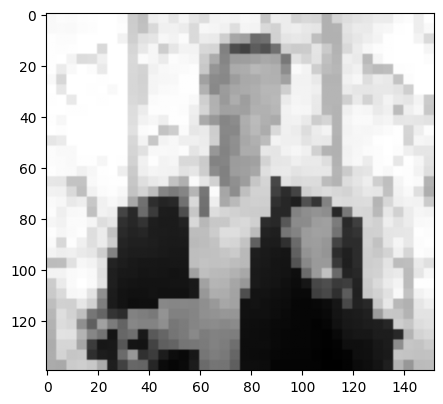

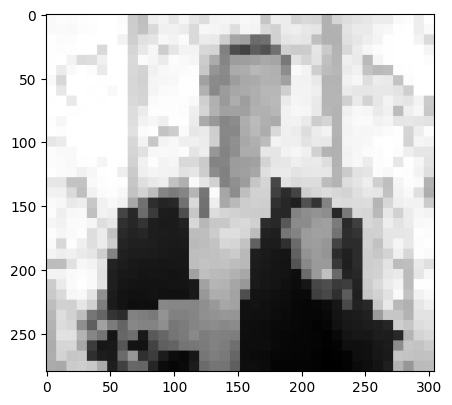

In [16]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [17]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
  #x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the subsampling routine
  # Replace this line
  #x_out = x_out
  # Calcula las dimensiones de la matriz de salida, que son el doble de las de entrada (x_in).
  out_height = x_in.shape[0] * 2
  out_width = x_in.shape[1] * 2

  # Inicializa la matriz de salida con ceros.
  x_out = np.zeros((out_height, out_width))

  # Itera sobre cada elemento de la matriz de entrada de baja resolución (x_in).
  for i in range(x_in.shape[0]):
    for j in range(x_in.shape[1]):
      # Obtiene el valor actual de la matriz de baja resolución.
      value_to_place = x_in[i, j]

      # Define las coordenadas del bloque 2x2 correspondiente en la imagen original de alta resolución.
      # Asegurarse de que el slicing no exceda los límites de x_high_res en caso de dimensiones impares.
      h_res_block_row_start = i * 2
      h_res_block_row_end = min(i * 2 + 2, x_high_res.shape[0])
      h_res_block_col_start = j * 2
      h_res_block_col_end = min(j * 2 + 2, x_high_res.shape[1])

      h_res_block = x_high_res[h_res_block_row_start : h_res_block_row_end,
                               h_res_block_col_start : h_res_block_col_end]

      # Si el bloque está vacío (por ejemplo, si x_high_res es más pequeño de lo esperado), continuar.
      if h_res_block.size == 0:
          continue

      # Encuentra el índice (plano) del valor máximo dentro de este bloque de alta resolución.
      # np.argmax devuelve el índice del primer máximo si hay duplicados.
      max_flat_idx = np.argmax(h_res_block)

      # Convierte el índice plano a coordenadas 2D relativas dentro del bloque.
      # El número de columnas del bloque es h_res_block.shape[1].
      relative_row_idx = max_flat_idx // h_res_block.shape[1]
      relative_col_idx = max_flat_idx % h_res_block.shape[1]

      # Calcula las coordenadas absolutas en la matriz de salida (x_out).
      abs_row_idx = h_res_block_row_start + relative_row_idx
      abs_col_idx = h_res_block_col_start + relative_col_idx

      # Coloca el valor de la matriz de baja resolución en la posición del máximo en x_out.
      x_out[abs_row_idx, abs_col_idx] = value_to_place

  return x_out



In [18]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[0. 0. 0. 0.]
 [6. 0. 0. 8.]
 [0. 0. 0. 4.]
 [0. 8. 0. 0.]]


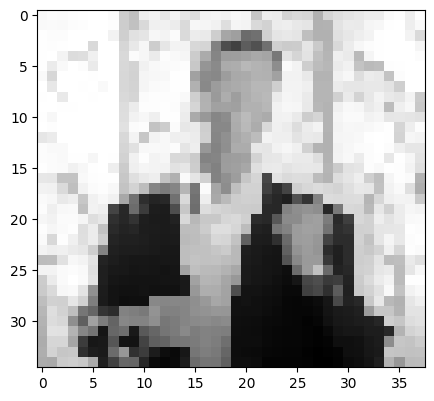

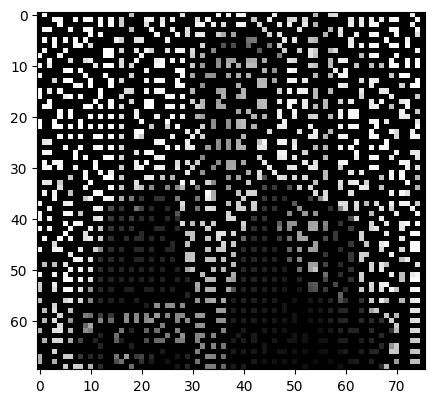

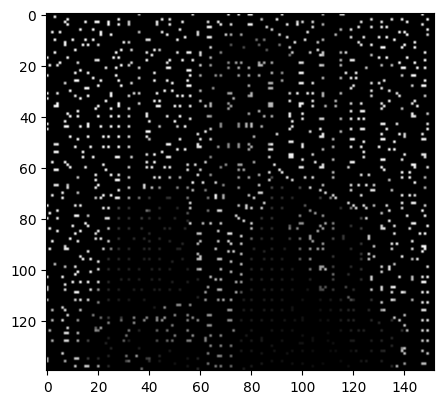

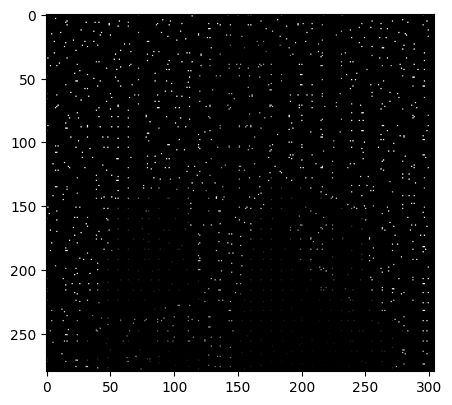

In [19]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [20]:
def bilinear(x_in):
  #x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  #x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  #x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # TODO -- write the duplication routine
  # Replace this line
  #x_out = x_out
  # Calcula las dimensiones de la matriz de salida, que son el doble de las de entrada.
  out_height = x_in.shape[0] * 2
  out_width = x_in.shape[1] * 2

  # Inicializa la matriz de salida con ceros.
  x_out = np.zeros((out_height, out_width))

  # Crea una versión acolchada de la matriz de entrada para manejar los bordes
  # sin necesidad de comprobaciones de límites complejas dentro del bucle.
  # Se añade una fila y columna extra de ceros para que la interpolación
  # siempre tenga 4 puntos de referencia.
  x_in_pad = np.zeros((x_in.shape[0] + 1, x_in.shape[1] + 1))
  x_in_pad[0:x_in.shape[0], 0:x_in.shape[1]] = x_in

  # Itera sobre cada píxel de la matriz de salida.
  for i in range(out_height):
    for j in range(out_width):
      # Calcula las coordenadas flotantes correspondientes en la matriz de entrada.
      # Dividimos por 2 porque estamos duplicando las dimensiones.
      # Se resta 0.5 para centrar el muestreo en el píxel de salida,
      # lo que corresponde a los 4 píxeles de entrada que lo rodean.
      x_coord = (i / 2.0) - 0.5
      y_coord = (j / 2.0) - 0.5

      # Encuentra los 4 píxeles vecinos más cercanos en la matriz de entrada acolchada.
      # np.floor para obtener el índice entero superior izquierdo.
      x1, y1 = int(np.floor(x_coord)), int(np.floor(y_coord))
      x2, y2 = x1 + 1, y1 + 1

      # Calcula los pesos para la interpolación.
      # Estos son los "pesos" o distancias fraccionarias desde el píxel de salida
      # a los píxeles de entrada.
      fx = x_coord - x1
      fy = y_coord - y1

      # Obtiene los valores de los 4 píxeles vecinos de la matriz acolchada.
      # Se asegura de que los índices no sean negativos (aunque x_in_pad lo maneja).
      # Los valores se toman de x_in_pad para evitar IndexError en los bordes.
      q11 = x_in_pad[max(0, x1), max(0, y1)]
      q12 = x_in_pad[max(0, x1), min(x_in_pad.shape[1] - 1, y2)]
      q21 = x_in_pad[min(x_in_pad.shape[0] - 1, x2), max(0, y1)]
      q22 = x_in_pad[min(x_in_pad.shape[0] - 1, x2), min(x_in_pad.shape[1] - 1, y2)]

      # Realiza la interpolación bilineal.
      # Primero, interpolación lineal en la dirección X para las filas y1 y y2.
      val_y1 = q11 * (1 - fx) + q21 * fx
      val_y2 = q12 * (1 - fx) + q22 * fx

      # Luego, interpolación lineal en la dirección Y.
      x_out[i, j] = val_y1 * (1 - fy) + val_y2 * fy

  return x_out

In [21]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[6.  6.  7.  8. ]
 [6.  6.  7.  8. ]
 [7.  7.  6.5 6. ]
 [8.  8.  6.  4. ]]


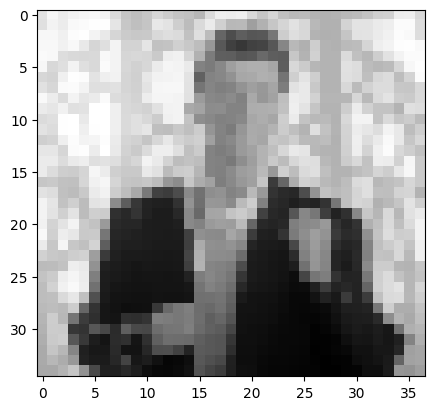

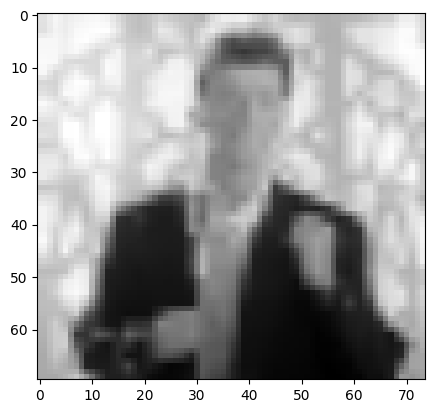

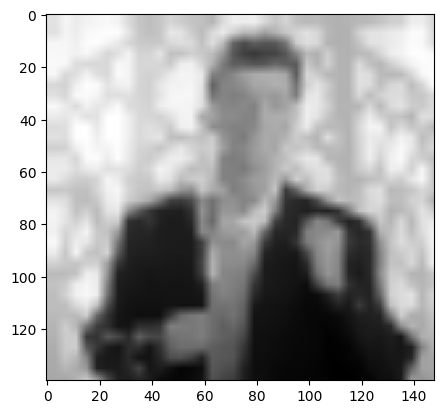

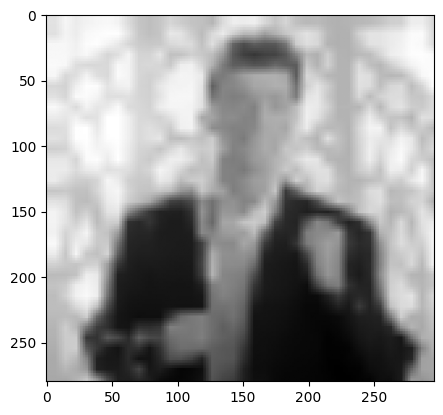

In [22]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()